In [1]:
import AnnotatedvcfParser as vcf
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
vcf_file_path = "/home/yabili/results/06_cosmic_annotation/Mutect2_filtered_HKNPC-090T_vs_HKNPC-090N_cosmic_annotation.vcf"
vcf_file=open(vcf_file_path, "r" )
vcfFile = vcf.readVCF(vcf_file)
vcfFileTranslisted = vcf.transcipts2ListVepSnpEff(vcfFile, "snpeffANNSplit,VepCSQSplit")
vcfFileTransplitted = vcf.splitransciptsVepSnpEff(vcfFileTranslisted, "VepCSQSplit")
vcfFileTransplittedPipe = vcf.pipe2Col(vcf_file, vcfFileTransplitted, "VepCSQSplit")

In [3]:
vcfFileTransplittedPipe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920 entries, 0 to 8919
Data columns (total 188 columns):
 #    Column                       Dtype 
---   ------                       ----- 
 0    CHROM                        object
 1    POS                          object
 2    ID                           object
 3    REF                          object
 4    ALT                          object
 5    QUAL                         object
 6    FILTER                       object
 7    INFO                         object
 8    FORMAT                       object
 9    NORMAL                       object
 10   TUMOR                        object
 11   AS_FilterStatus              object
 12   AS_SB_TABLE                  object
 13   AS_UNIQ_ALT_READ_COUNT       object
 14   CONTQ                        object
 15   DP                           object
 16   ECNT                         object
 17   GERMQ                        object
 18   MBQ                          object
 19   MFRL

In [4]:
#REFERENCE: https://www.alpharithms.com/fix-a-missing-value-in-pandas-dataframe-334915/
vcfFileTransplittedPipe.replace(".", "NA", inplace=True)
vcfFileTransplittedPipe.replace("", "NA", inplace=True)
vcfFileTransplittedPipe.replace("NA", np.nan, inplace=True)

In [5]:
vcfFileTransplittedPipe["MOTIF_SCORE_CHANGE"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8915    NaN
8916    NaN
8917    NaN
8918    NaN
8919    NaN
Name: MOTIF_SCORE_CHANGE, Length: 8920, dtype: object

In [6]:
vcfFileTransplittedPipe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920 entries, 0 to 8919
Data columns (total 188 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    CHROM                        object 
 1    POS                          object 
 2    ID                           object 
 3    REF                          object 
 4    ALT                          object 
 5    QUAL                         float64
 6    FILTER                       object 
 7    INFO                         object 
 8    FORMAT                       object 
 9    NORMAL                       object 
 10   TUMOR                        object 
 11   AS_FilterStatus              object 
 12   AS_SB_TABLE                  object 
 13   AS_UNIQ_ALT_READ_COUNT       float64
 14   CONTQ                        float64
 15   DP                           object 
 16   ECNT                         object 
 17   GERMQ                        object 
 18   MBQ                       

In [7]:
a = len(vcfFileTransplittedPipe)
vcfFileTransplittedPipe.dropna(axis=1, how='all', inplace=True)

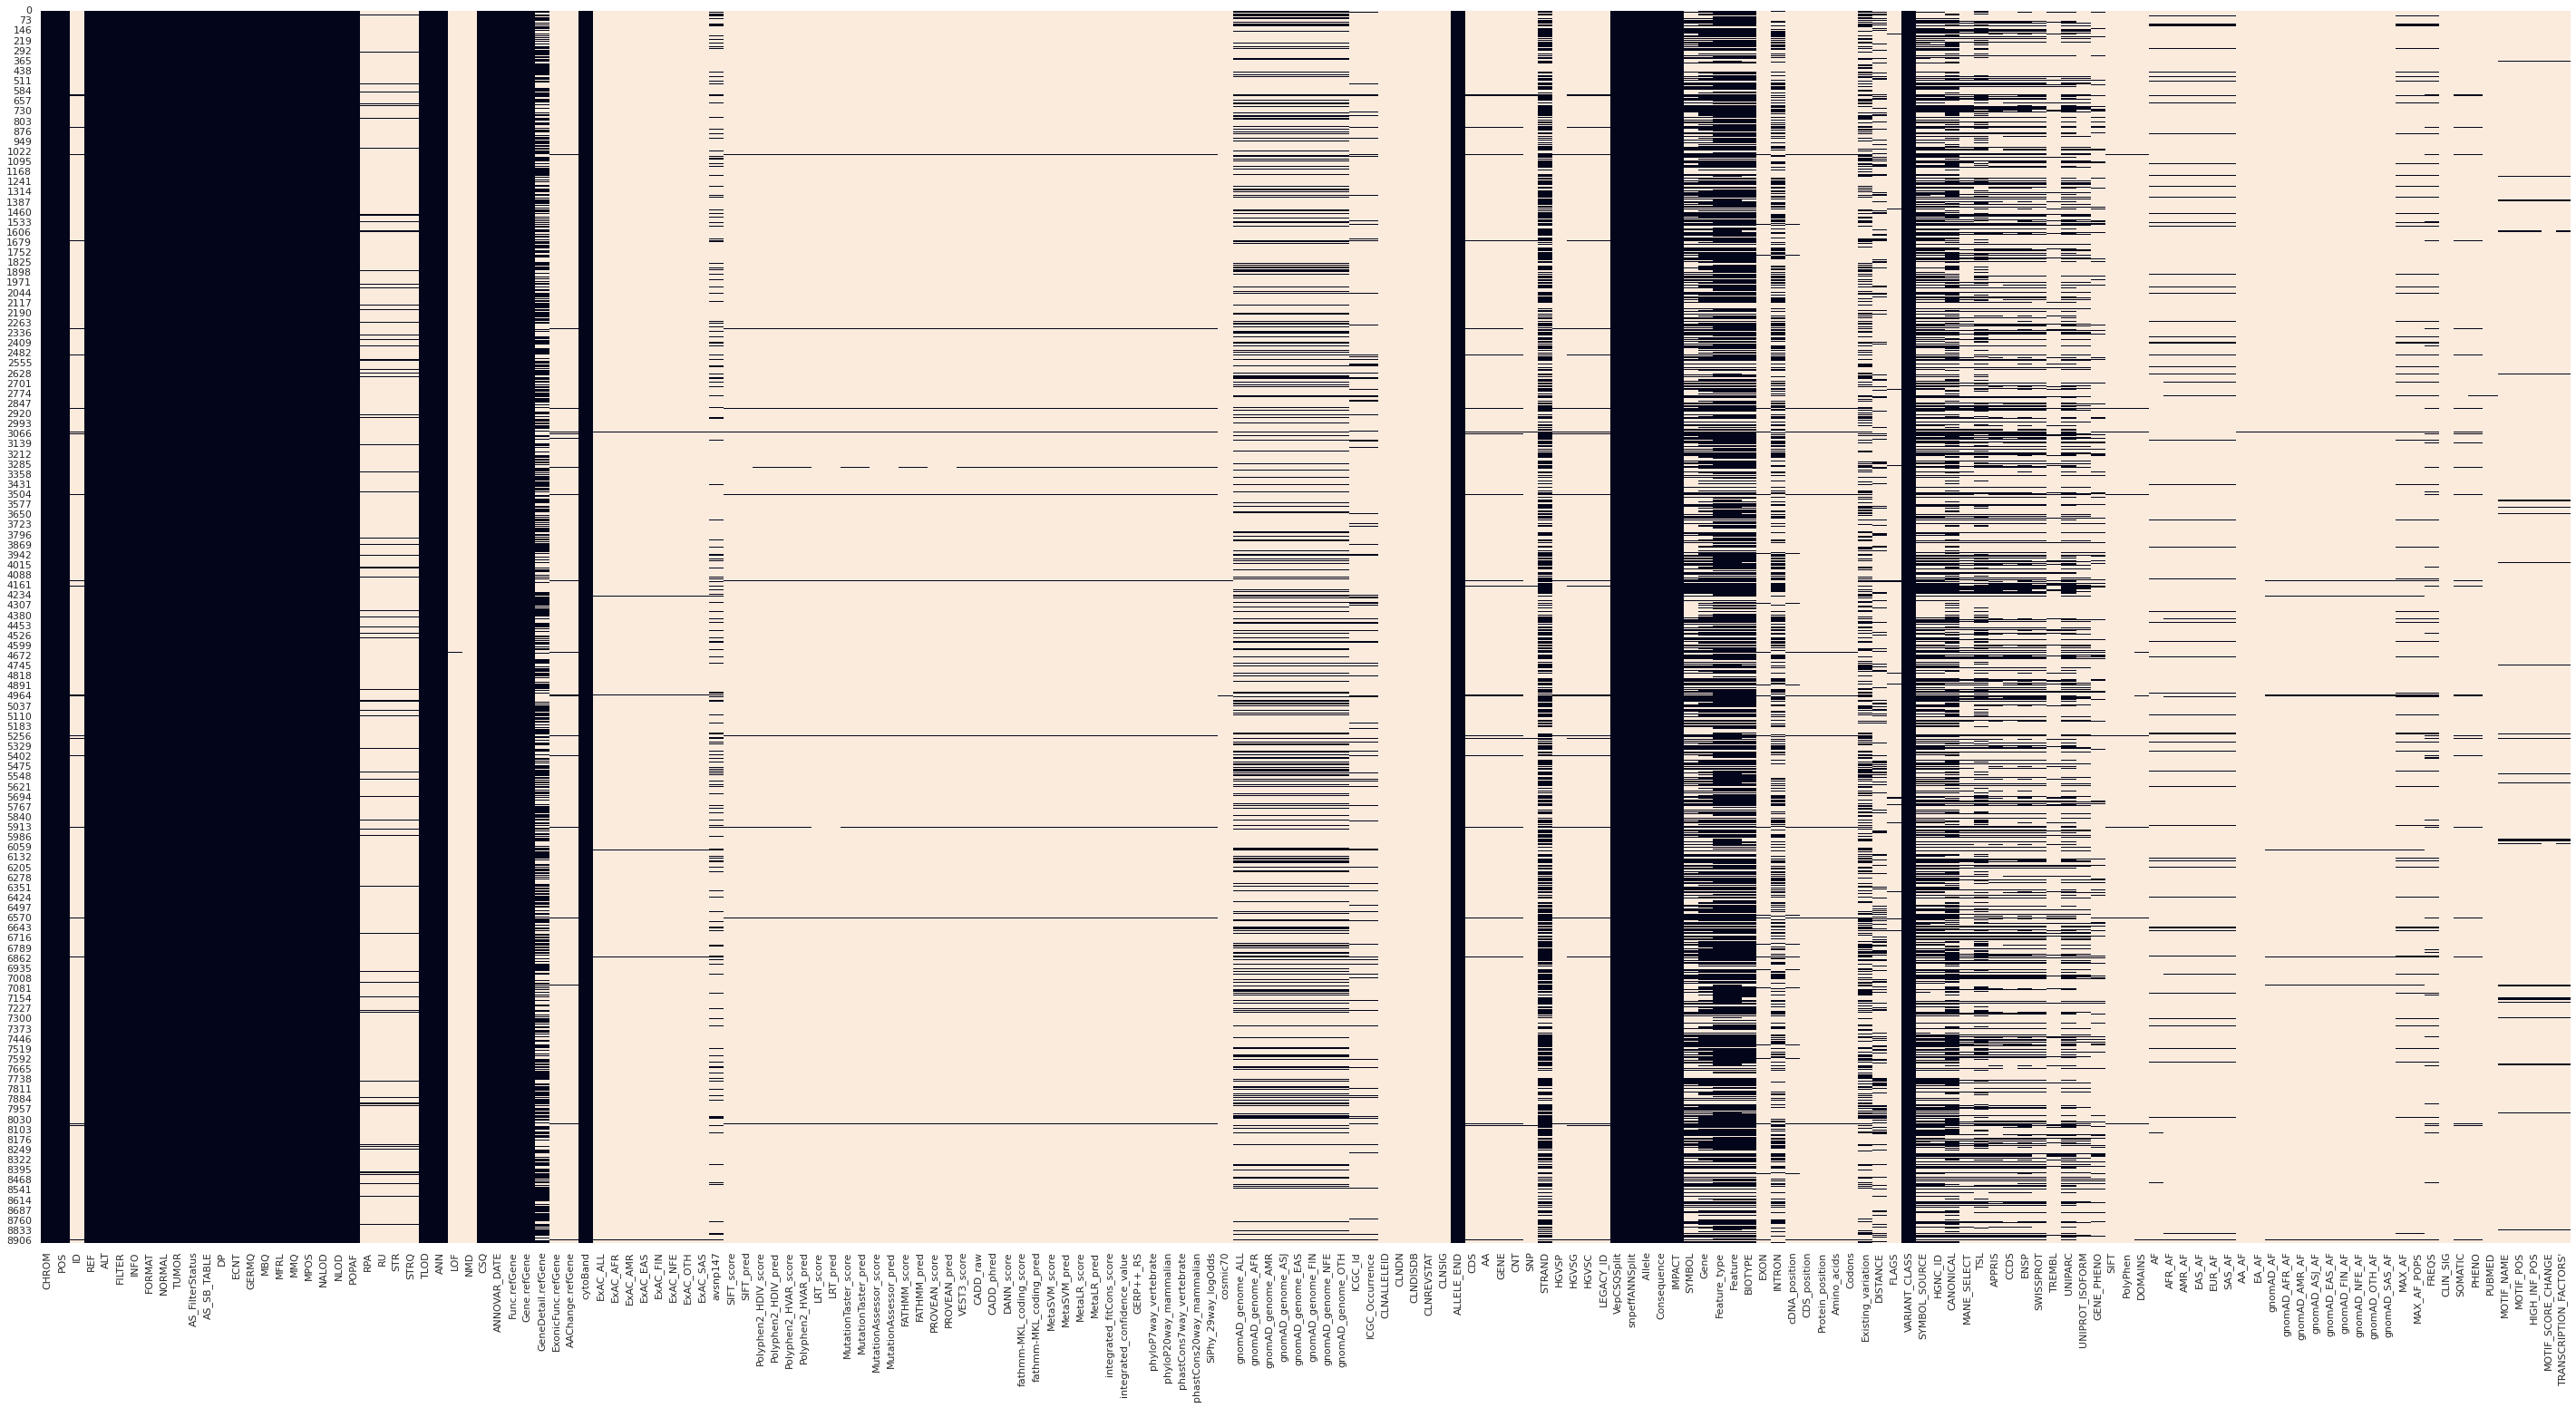

In [8]:
sns.set(rc = {'figure.figsize':(50,25)})
plot = sns.heatmap(vcfFileTransplittedPipe.isnull(), cbar=False)
plot.figure.savefig("output.png")


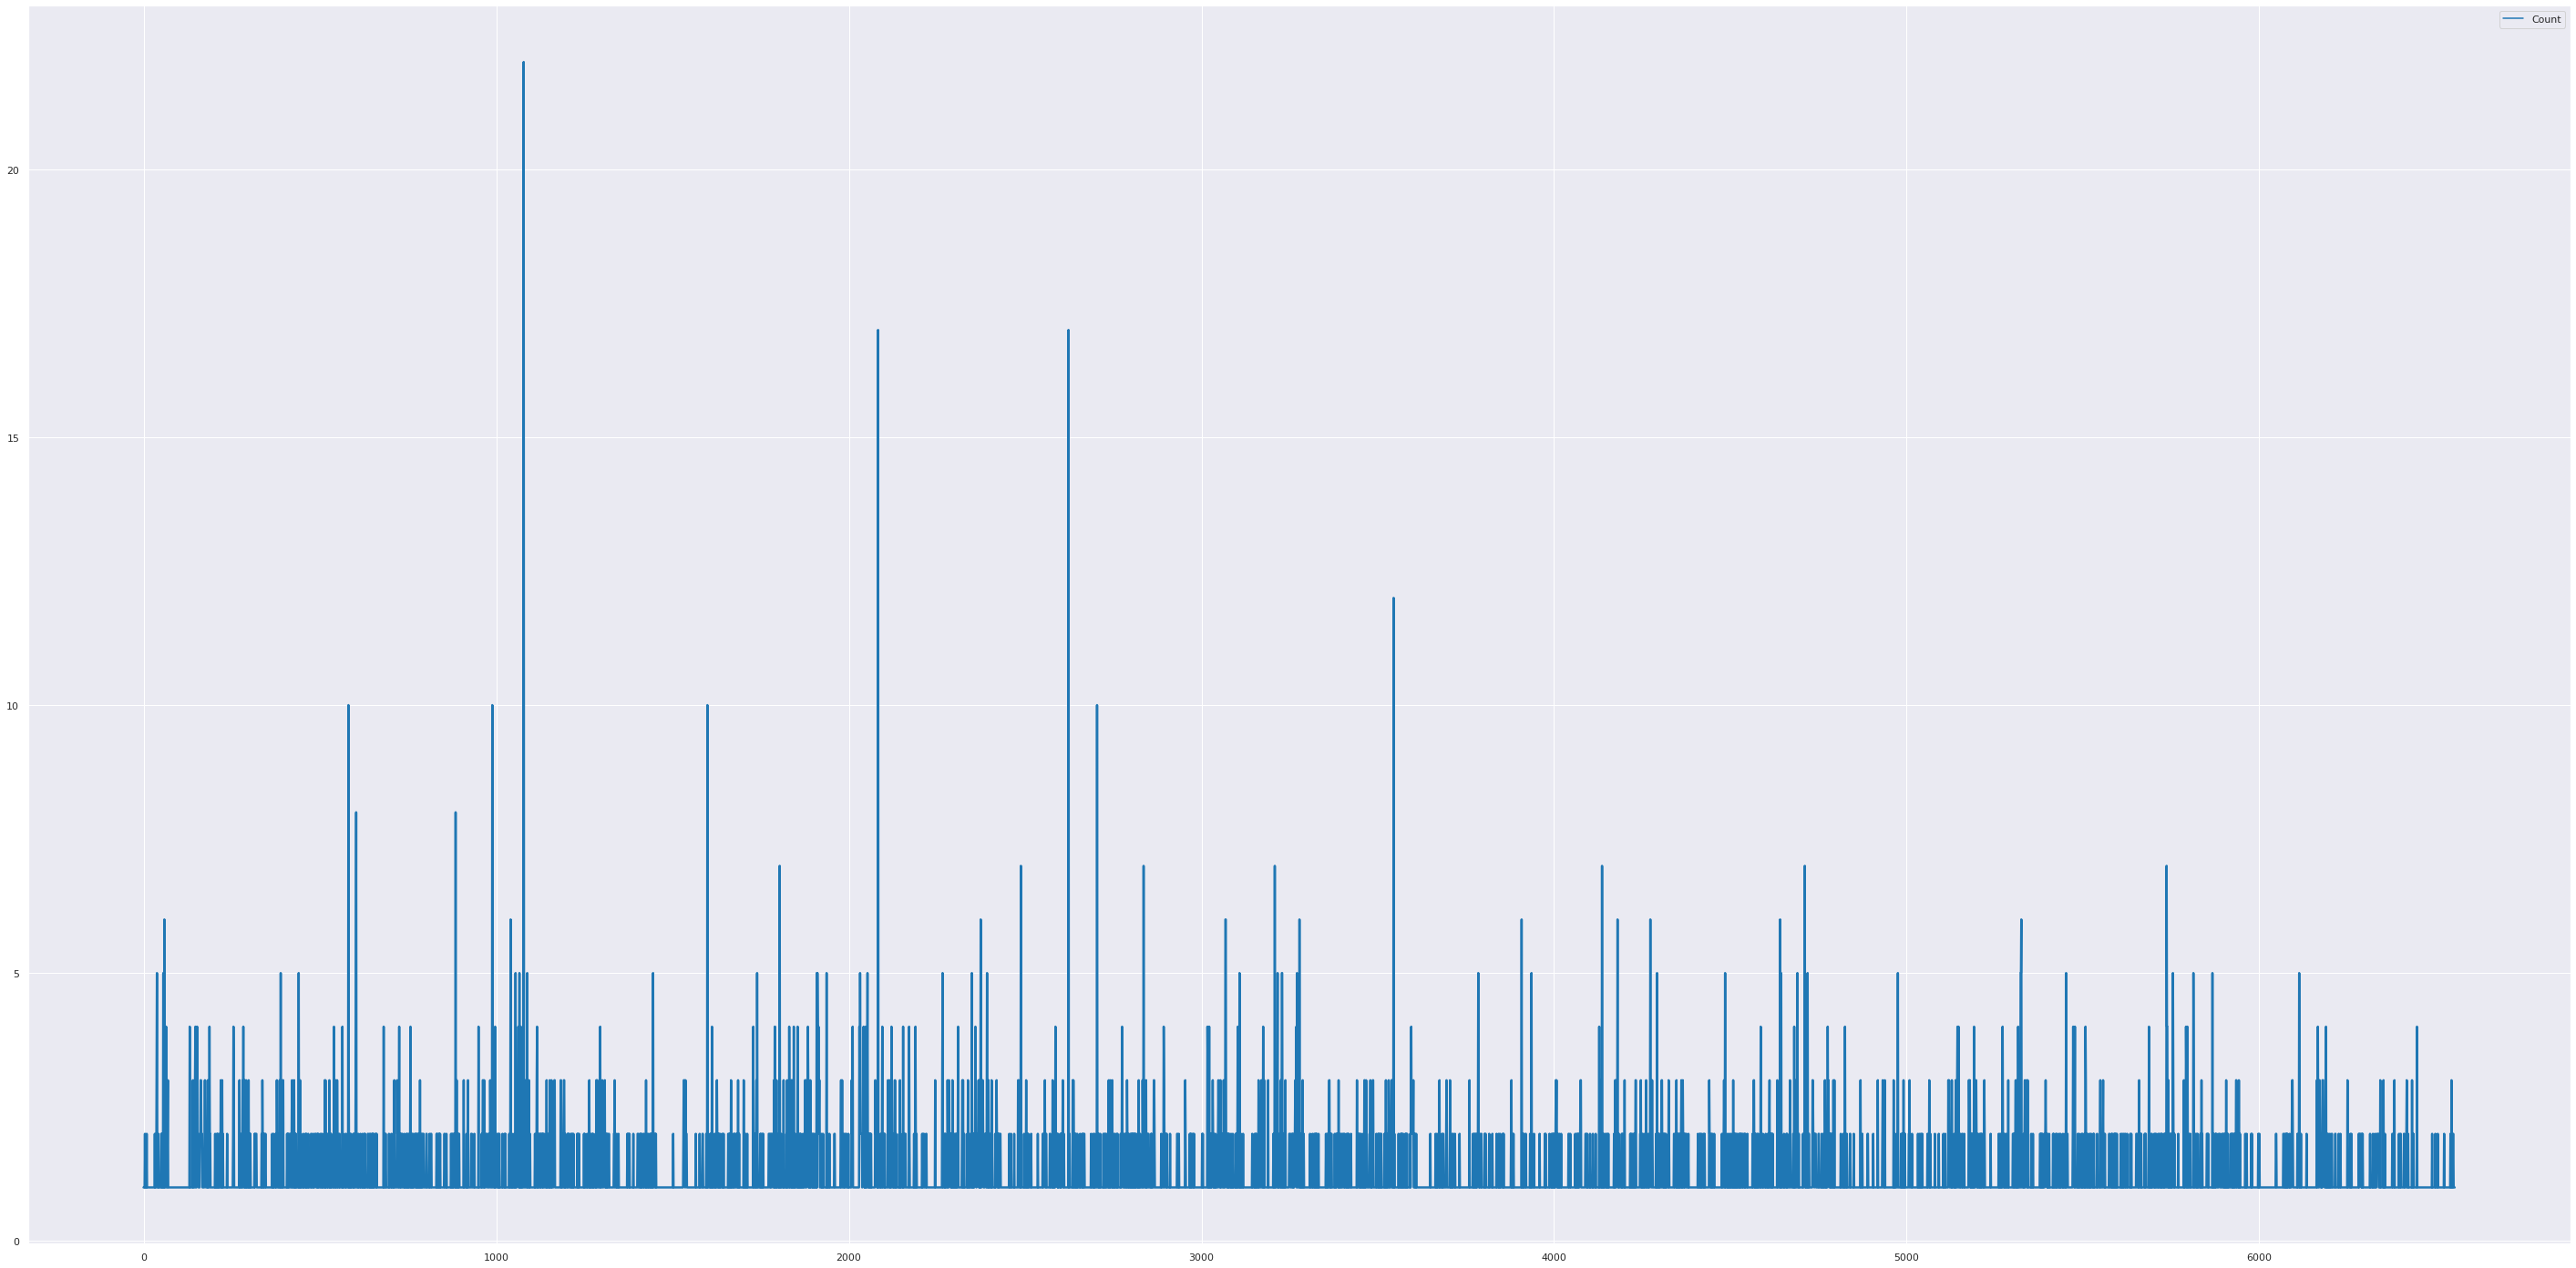

In [9]:
#sns.set(rc = {'figure.figsize':(50,25)})
dup = vcfFileTransplittedPipe[["CHROM", "POS", "REF", "ALT"]].copy()
dup['Count'] = 1
dup2= dup.groupby(["CHROM", "POS", "REF", "ALT"]).Count.count().reset_index()
dup2
#plot = sns.heatmap(dup, cbar=False)
plot2= sns.lineplot(data=dup2, palette="tab10", linewidth=2.5)
plot2.figure.savefig("output2.png")

In [10]:
dup2[dup2["Count"]>10]

,CHROM,POS,REF,ALT,Count
1078,chr12,115000264,C,T,22
2083,chr17,61455340,C,A,17
2623,chr2,196799769,C,T,17
3545,chr3,45818506,TG,T,12


In [11]:
#Reference
pd.set_option('display.max_columns', None)

In [12]:
#chr12 115000264
#vcfFileTransplittedPipe[vcfFileTransplittedPipe["CHROM"] == "chr12" & vcfFileTransplittedPipe.vcfFileTransplittedPipe["POS"] == 115000264]
vcfFileTransplittedPipe[vcfFileTransplittedPipe["CHROM"] == "chr12" ]
vcfFileTransplittedPipe[vcfFileTransplittedPipe["POS"] == "115000264"]

,CHROM,POS,ID,REF,ALT,FILTER,INFO,FORMAT,NORMAL,TUMOR,AS_FilterStatus,AS_SB_TABLE,DP,ECNT,GERMQ,MBQ,MFRL,MMQ,MPOS,NALOD,NLOD,POPAF,RPA,RU,STR,STRQ,TLOD,ANN,LOF,NMD,CSQ,ANNOVAR_DATE,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,cosmic70,gnomAD_genome_ALL,gnomAD_genome_AFR,gnomAD_genome_AMR,gnomAD_genome_ASJ,gnomAD_genome_EAS,gnomAD_genome_FIN,gnomAD_genome_NFE,gnomAD_genome_OTH,ICGC_Id,ICGC_Occurrence,CLNALLELEID,CLNDN,CLNDISDB,CLNREVSTAT,CLNSIG,ALLELE_END,CDS,AA,GENE,CNT,SNP,STRAND,HGVSP,HGVSG,HGVSC,LEGACY_ID,VepCSQSplit,snpeffANNSplit,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,DISTANCE,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,TSL,APPRIS,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,UNIPROT_ISOFORM,GENE_PHENO,SIFT,PolyPhen,DOMAINS,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,AA_AF,EA_AF,gnomAD_AF,gnomAD_AFR_AF,gnomAD_AMR_AF,gnomAD_ASJ_AF,gnomAD_EAS_AF,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,MAX_AF,MAX_AF_POPS,FREQS,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS'
5992,chr12,115000264,NaN,C,T,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0","0/1:53,26:0.339:79:26,13:25,13:20,33,8,18",SITE,"31,63|8,18",126,1,93,"27,37","380,342","60,60",28,1.62,12.19,6,NaN,NaN,NaN,NaN,86.79,T|intergenic_region|MODIFIER|AC009804.1-AC0081...,NaN,NaN,T|regulatory_region_variant|MODIFIER|||Regulat...,2020-06-08,intergenic,TBX3\x3bMED13L,dist\x3d316089\x3bdist\x3d958312,NaN,NaN,12q24.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T|regulatory_region_variant|MODIFIER|||Regulat...,[T|intergenic_region|MODIFIER|AC009804.1-AC008...,T,regulatory_region_variant,MODIFIER,NaN,NaN,RegulatoryFeature,ENSR00001194130,enhancer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs915142437,NaN,NaN,SNV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5993,chr12,115000264,NaN,C,T,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0","0/1:53,26:0.339:79:26,13:25,13:20,33,8,18",SITE,"31,63|8,18",126,1,93,"27,37","380,342","60,60",28,1.62,12.19,6,NaN,NaN,NaN,NaN,86.79,T|intergenic_region|MODIFIER|AC009804.1-AC0081...,NaN,NaN,T|regulatory_region_variant|MODIFIER|||Regulat...,2020-06-08,intergenic,TBX3\x3bMED13L,dist\x3d316089\x3bdist\x3d958312,NaN,NaN,12q24.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,T|TF_binding_site_variant|MODIFIER|||MotifFeat...,[T|intergenic_region|MODIFIER|AC009804.1-AC008...,T,TF_binding_site_variant,MODIFIER,NaN,NaN,MotifFeature,ENSM00191990009,NaN,NaN

# CALCULATE MUTATIONAL TUMOR BURDEN

# CALCULATE VAF